<a href="https://colab.research.google.com/github/joachinhimself/My-projects-/blob/main/The_Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/sample_data/housing.csv')

In [4]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
df.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
df.shape

(333, 15)

In [7]:
df.columns.values

array(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'], dtype=object)

In [8]:
df.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [10]:
df.nunique()

ID         333
crim       332
zn          25
indus       68
chas         2
nox         77
rm         308
age        260
dis        295
rad          9
tax         59
ptratio     42
black      237
lstat      310
medv       192
dtype: int64

In [11]:
df['zn'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  34. ,  33. ,  35. ])

In [12]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


# findings

(1) ID is an integer but have no valuable computation.

(2) Chas is variable.

(3) There are noticeble large difference between the 75 percentile and Maximum values for columns in; Crim and ZN.

(4)  There are also some difference is in 75 percentile and maximum values of indus,lstat, nox, dis, tax and medv.

(5) The median is larger than the mean in the column "ptratrio"

(6) ID and Chas will be dropped 

(7) Apart from ID and Chas, other datas are quantitative and highlights Boston housing.


In [13]:
df= df.drop(columns=['chas','ID'])
df.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [14]:
df.isnull().sum()

crim       0
zn         0
indus      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

#Univariate Analysis

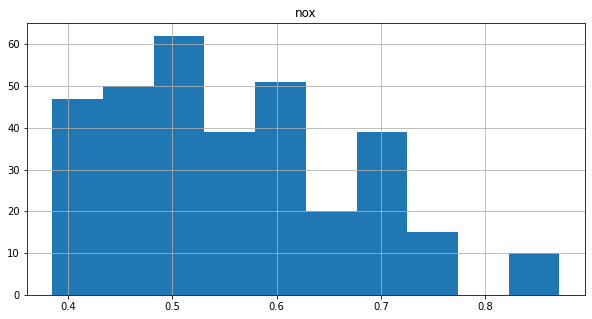

In [15]:
df[["nox",]].hist(figsize=(10, 5))
plt.show()

#Bivariate analysis

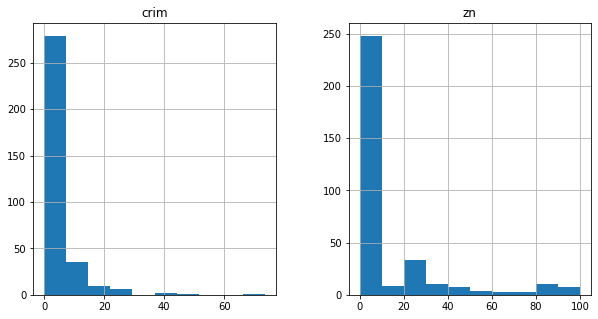

In [16]:
df[["crim", "zn"]].hist(figsize=(10, 5))
plt.show()

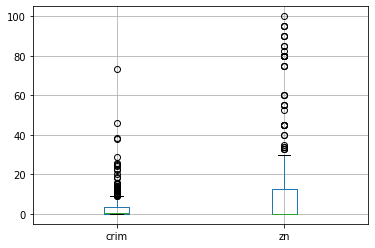

In [17]:
df[["crim", "zn"]].boxplot()

#Multivariant Analysis

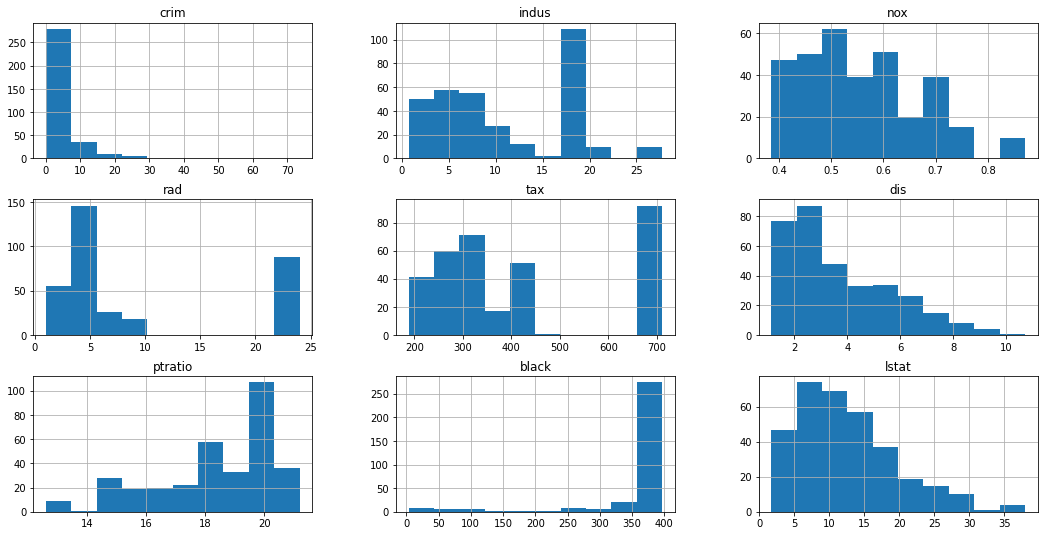

In [18]:
df[["crim", "indus", "nox", "rad", "tax", "dis","ptratio","black","lstat"]].hist(figsize=(18, 9))
plt.show()

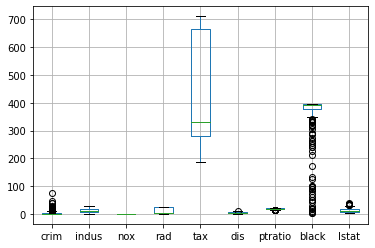

In [19]:
df[["crim", "indus", "nox", "rad", "tax", "dis","ptratio","black","lstat"]].boxplot()

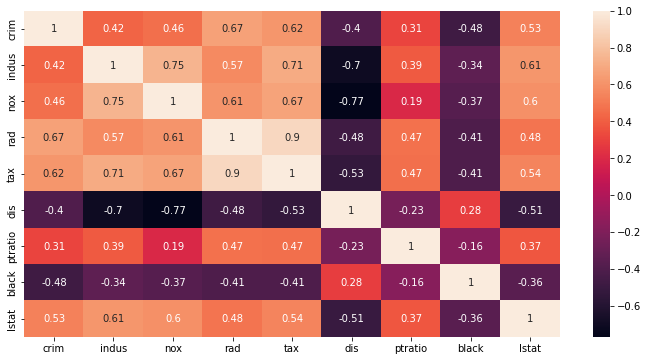

In [20]:
plt.subplots(figsize=(12,6))
correlation_matrix = df[["crim", "indus", "nox", "rad", "tax", "dis","ptratio","black","lstat"]].corr()
sns.heatmap(correlation_matrix,annot=True)

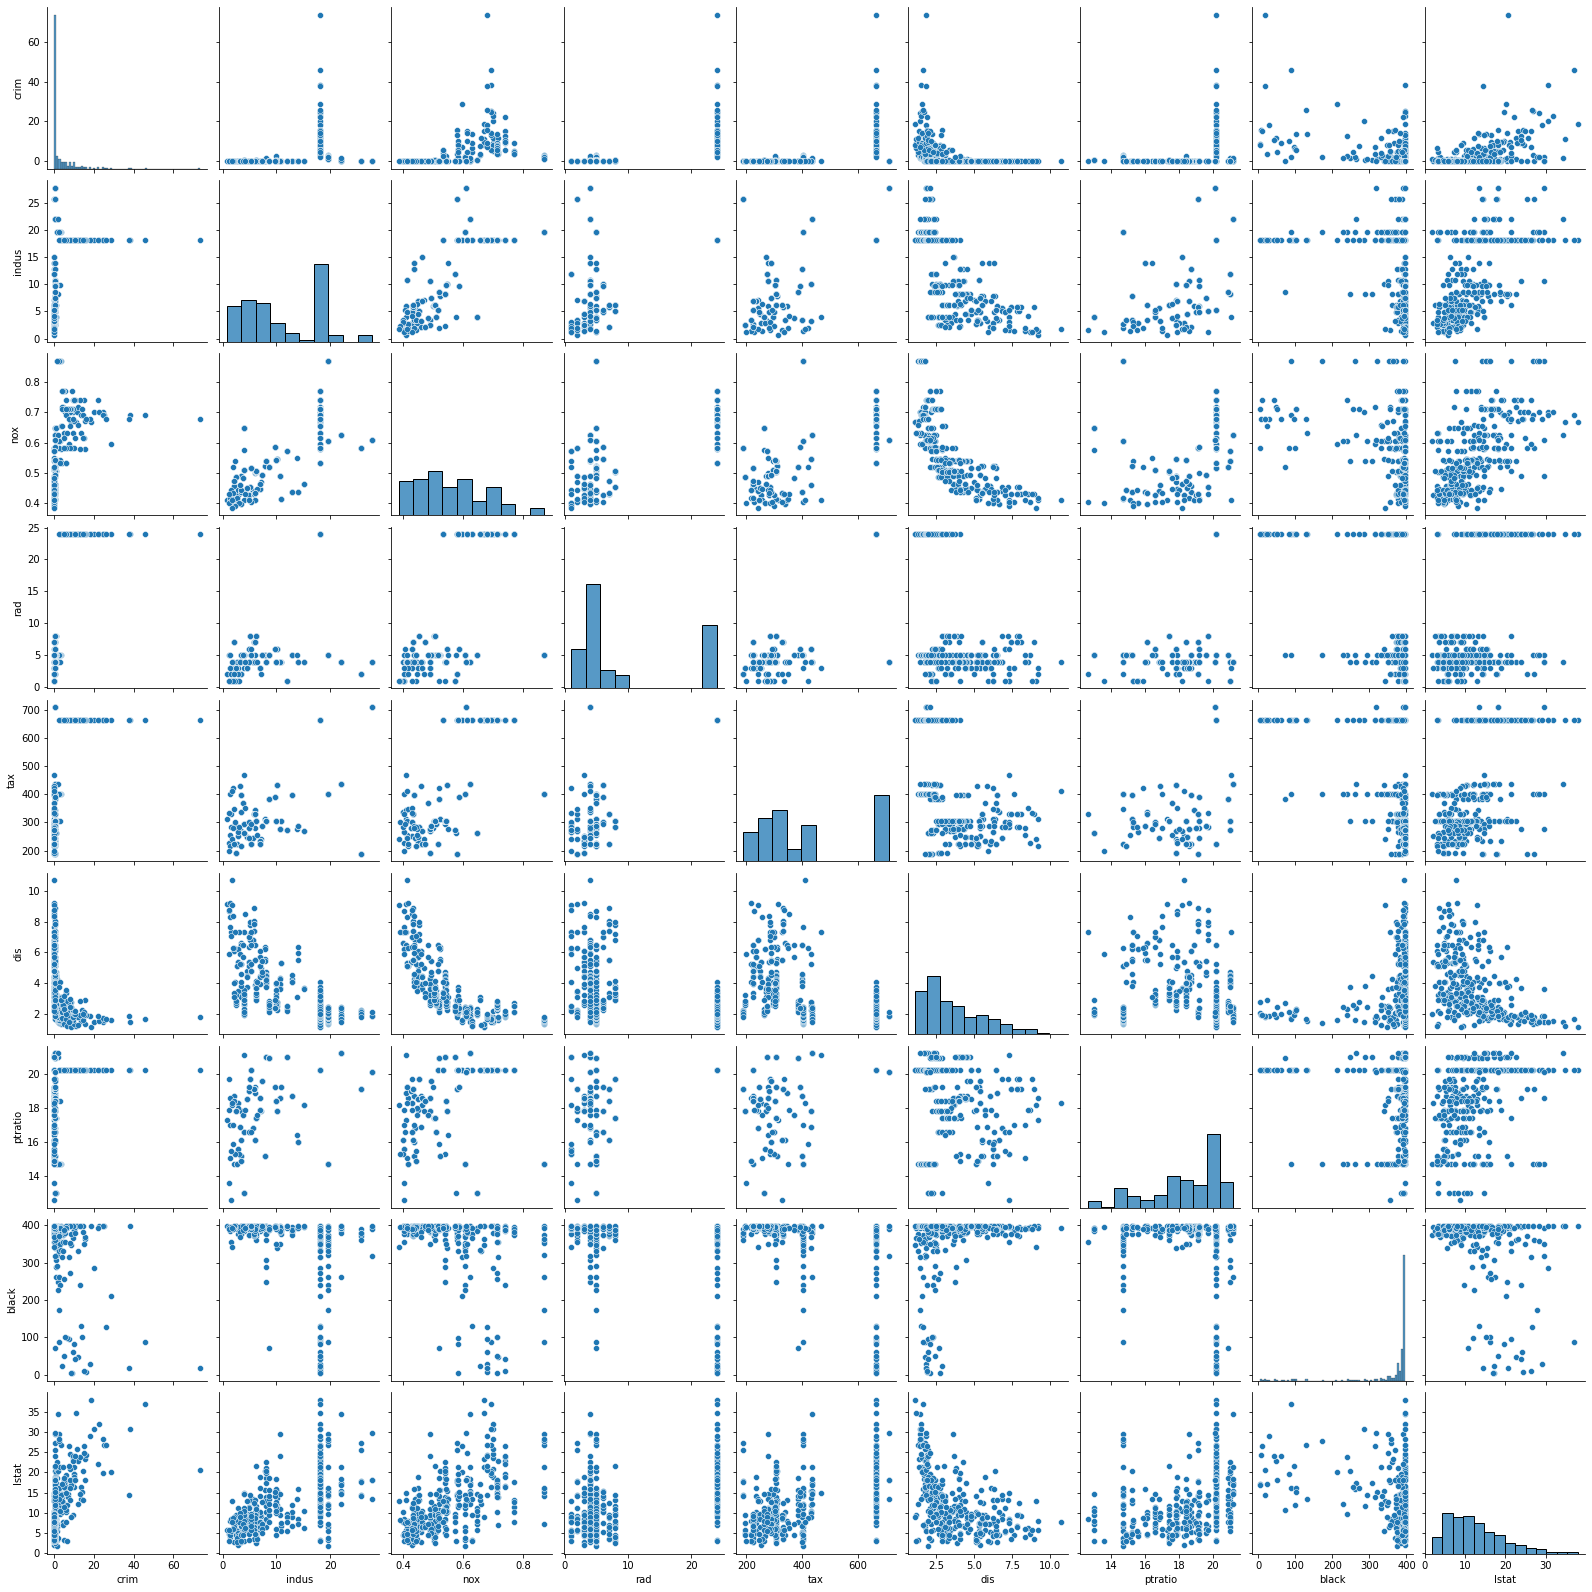

In [21]:
sns.pairplot(df[["crim", "indus", "nox", "rad", "tax", "dis","ptratio","black","lstat"]])

In [22]:
selection = ["crim", "age", "dis", "ptratio","lstat"]
df5 = df[selection]
df5

,crim,age,dis,ptratio,lstat
0,0.00632,65.2,4.0900,15.3,4.98
1,0.02731,78.9,4.9671,17.8,9.14
2,0.03237,45.8,6.0622,18.7,2.94
3,0.06905,54.2,6.0622,18.7,5.33
4,0.08829,66.6,5.5605,15.2,12.43
...,...,...,...,...,...
328,0.17783,73.5,2.3999,19.2,15.10
329,0.06263,69.1,2.4786,21.0,9.67
330,0.04527,76.7,2.2875,21.0,9.08
331,0.06076,91.0,2.1675,21.0,5.64


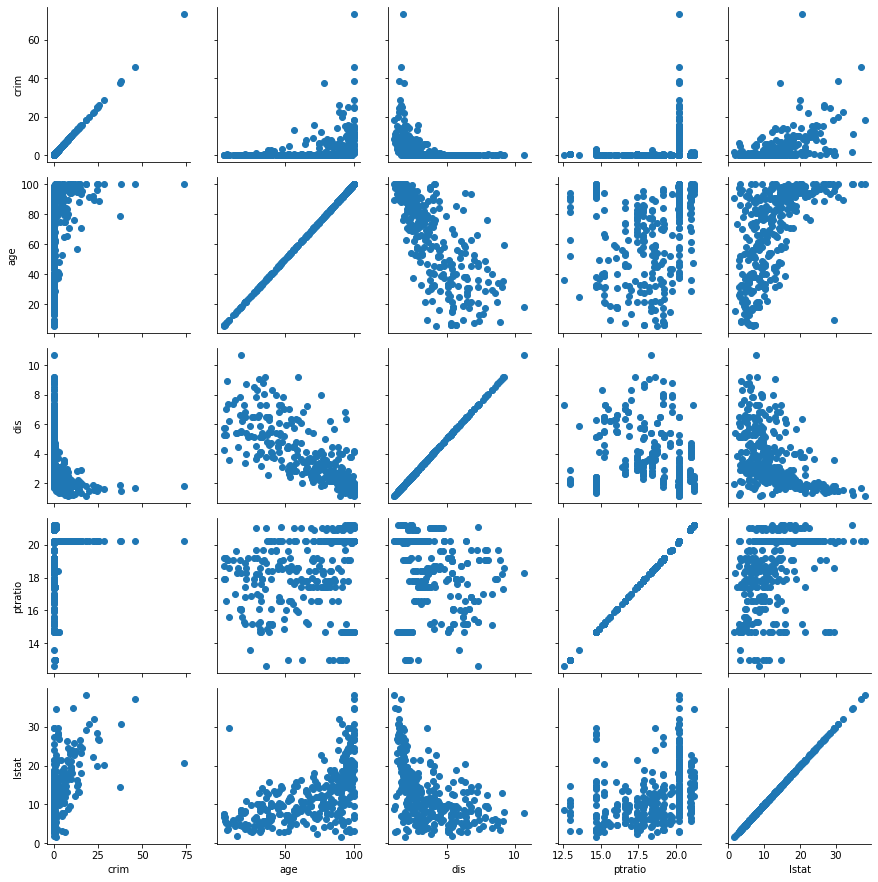

In [23]:
g = sns.PairGrid(df5)
g.map(plt.scatter);

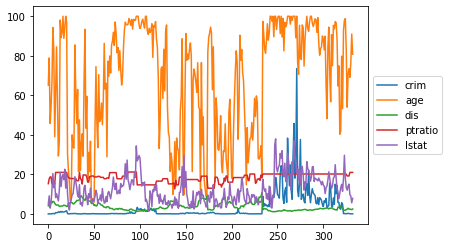

In [24]:
profile_plot = df[["crim", "age", "dis", "ptratio","lstat"]].plot()
profile_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [25]:
# checking missing values

In [26]:
missing_values = df.isnull().sum()
missing_values

crim       0
zn         0
indus      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

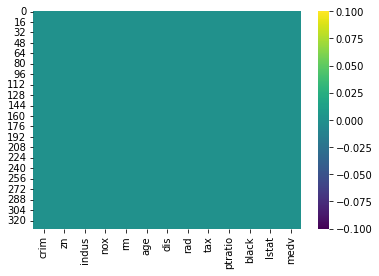

In [27]:
missing_values = df.isnull()
missing_values
sns.heatmap(data = missing_values, cmap='viridis')